In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# SE LEE LA BASE DE DATOS (CONTAMINANTES 2018)
f = open('contaminantes_2018.json')
db_contaminantes = json.load(f)
f.close()

In [3]:
# SE CREA LA LISTA DE CONTAMINANTES
ls_contaminantes = list(db_contaminantes['pollutionMeasurements']['date']['2018-01-01 01:00'].keys())
# SE CREA LA LISTA DE ESTACIONES
ls_estaciones = list(db_contaminantes['pollutionMeasurements']['date']['2018-01-01 01:00']['O3'].keys())
# SE CREA EL ARRAY DE COLORES
colores = ['#0FFF95', '#D7263D', '#2A45CB', '#D62EBD', '#8884FF', '#6FE33D', '#D11C25', '#F1B127', '#FF0ACE']

In [4]:
# SE CREA LA TABLA DE CONTEOS VALIDOS
tb_conteos = pd.DataFrame()
# SE CREA LA TABLA DE CONTEOS NO VALIDOS
tb_invalidos = pd.DataFrame()

# SE CREA LA TABLA DE CONTAMINANTES vs ESTACIONES
for idx, contaminante in enumerate(ls_contaminantes):
    # SE CREA LA COLUMNAS POR CONTAMINANTES
    ls_conteoEstacion = []
    ls_conteoInvalido = []

    if contaminante in ls_contaminantes:
        for jdx, estacion in enumerate(ls_estaciones):
            # SE INICIALIZAN LOS CONTEOS POR ESTACION
            conteoValidos = 0
            conteoNoValidos = 0
            
            for kdx, fecha in enumerate(db_contaminantes['pollutionMeasurements']['date'].keys()):
                if estacion in db_contaminantes['pollutionMeasurements']['date'][fecha][contaminante].keys():
                    if len(db_contaminantes['pollutionMeasurements']['date'][fecha][contaminante][estacion]) > 0:
                        conteoValidos += 1
                    else:
                        conteoNoValidos += 1
                else:
                    conteoNoValidos += 1
            
            # SE AGREGAN LOS REGISTROS POR ESTACION
            ls_conteoEstacion.append(conteoValidos)
            ls_conteoInvalido.append(conteoNoValidos)
    
    # SE AGREGA LA COLUMNA DEL CONTAMINANTE A LA TABLA
    tb_conteos[contaminante] = ls_conteoEstacion
    tb_invalidos[contaminante] = ls_conteoInvalido

In [5]:
tb_conteos = tb_conteos.transpose()
tb_conteos.columns = ls_estaciones
tb_conteos

,ACO,AJU,ATI,CAM,MON,CHO,COY,CUA,CUT,FAC,...,UIZ,VIF,XAL,CCA,MGH,AJM,MPA,BJU,INN,GAM
CO,6484,0,7492,7070,7493,6147,0,8401,0,7154,...,7331,7271,7716,7293,8068,8005,5022,8445,7556,0
NO,6466,0,6855,6988,7308,4723,0,7743,7817,7694,...,7879,7237,7677,7250,8011,7951,0,0,0,0
NO2,6466,0,6855,6988,7308,4723,0,7743,7817,7694,...,7879,7237,7677,7250,8011,7951,0,0,0,0
NOX,6466,0,6855,6988,7308,4723,0,7743,7817,7694,...,7879,7237,7677,7250,8011,7951,0,0,0,0
O3,6445,5138,8187,6999,7187,6072,0,8057,7975,7389,...,7877,7423,7591,7144,7676,7356,6482,8367,7295,7754
PM10,6566,0,8264,6032,0,5070,0,8170,7662,6811,...,4931,7397,7069,0,8111,8050,0,8427,4239,254
SO2,6015,0,7588,6279,7467,5987,0,8349,7893,6905,...,7835,7410,7660,7692,5942,8041,5892,8099,7381,0
PM2.5,0,2410,0,6032,0,0,0,0,0,0,...,4931,0,7069,6775,8111,8050,0,8427,4239,8120
PMCO,0,0,0,6032,0,0,0,0,0,0,...,4931,0,7069,0,8111,8050,0,8427,4239,254


In [6]:
# SE OBTIENE LA ESTACIÓN CON MAYOR NUMERO DE MEDICIONES
estacionMAX = tb_conteos.sum().idxmax()
valoresMAX = tb_conteos[estacionMAX].sum()


In [7]:
print(f'La estación con mayor número de mediciones en 2018, es: {estacionMAX} con {valoresMAX} registros')

La estación con mayor número de mediciones en 2018, es: AJM con 71405 registros


In [8]:
# SE CREA LA TABLA DE LA ESTACION CON MAYOR VALORES OBTENIDOS
tb_ajusco = pd.DataFrame()

for idx, date in enumerate(db_contaminantes['pollutionMeasurements']['date']):
    # SE FORMATEA EL RESGISTRO A TIPO FECHA
    fecha = datetime.strptime(date.replace('24:00', '00:00'), '%Y-%m-%d %H:%M')
    for jdx, contaminante in enumerate(ls_contaminantes):
        # SE INSERTAN LOS VALORES COMO TIPO DECIMAL Y SE OMITEN LOS VACÍOS
        valorCNT = db_contaminantes['pollutionMeasurements']['date'][date][contaminante][estacionMAX] if len(db_contaminantes['pollutionMeasurements']['date'][date][contaminante][estacionMAX]) > 0 else '0'
        tb_ajusco.loc[fecha, contaminante] = float(valorCNT)

tb_ajusco

,CO,NO,NO2,NOX,O3,PM10,SO2,PM2.5,PMCO
2018-01-01 01:00:00,0.8,2.0,25.0,26.0,31.0,92.0,6.0,65.0,27.0
2018-01-01 02:00:00,0.7,2.0,22.0,23.0,28.0,95.0,7.0,72.0,23.0
2018-01-01 03:00:00,0.7,3.0,20.0,23.0,29.0,81.0,6.0,62.0,19.0
2018-01-01 04:00:00,0.5,3.0,14.0,17.0,33.0,59.0,6.0,44.0,14.0
2018-01-01 05:00:00,0.4,1.0,11.0,12.0,33.0,48.0,6.0,37.0,12.0
...,...,...,...,...,...,...,...,...,...
2018-12-31 20:00:00,0.7,2.0,32.0,34.0,33.0,52.0,2.0,31.0,21.0
2018-12-31 21:00:00,0.7,2.0,31.0,33.0,20.0,58.0,1.0,34.0,25.0
2018-12-31 22:00:00,0.5,1.0,20.0,21.0,25.0,49.0,2.0,24.0,25.0
2018-12-31 23:00:00,0.4,1.0,13.0,14.0,32.0,46.0,2.0,23.0,23.0


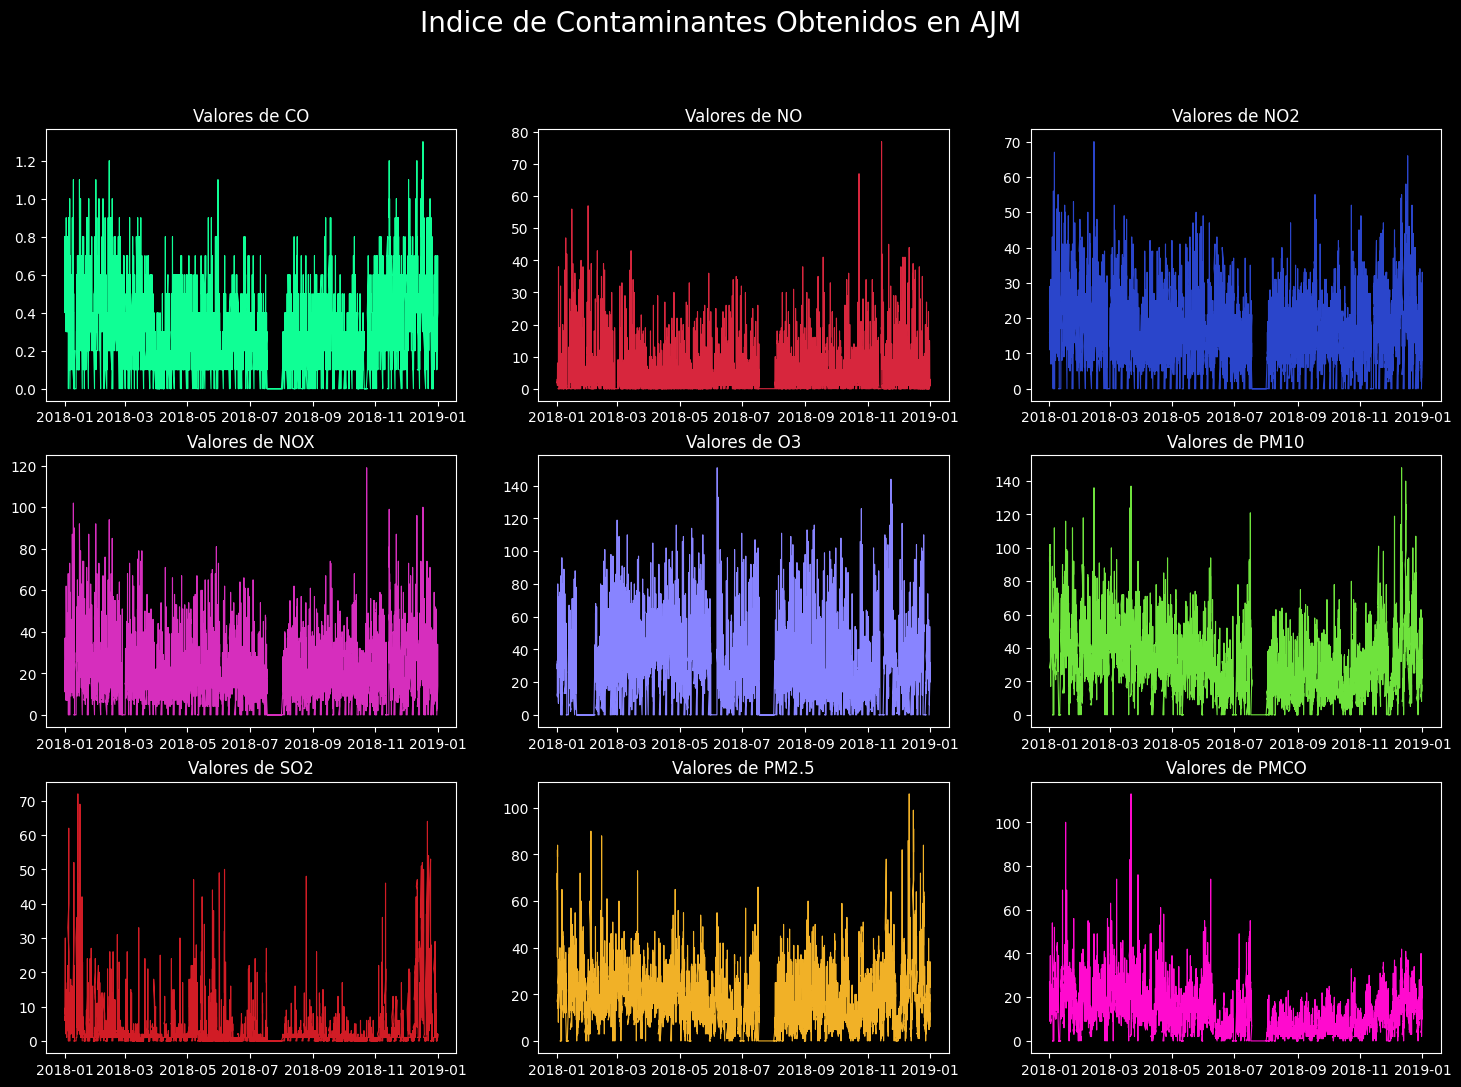

In [13]:
# SE GRAFICAN LOS RESULTADOS
plt.style.use('dark_background')
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(18,12))
plt.suptitle(f'Indice de Contaminantes Obtenidos en {estacionMAX}', fontsize=20)

for idx, contaminante in enumerate(tb_ajusco.columns):
    plt.subplot(3, 3, idx+1)
    plt.plot(tb_ajusco.index, tb_ajusco[contaminante], linewidth=0.8, color=colores[idx])
    plt.title(f'Valores de {contaminante}')
plt.show()

In [9]:
#C0,N0,N02,N0X,03,Pm10,so2,pm2.5,pmco
contingencias = [[1.125],[106],[106],[106],[144,154,204],[172,214,354],[110],[81.5,97.4,150.4],[172,214,354]]

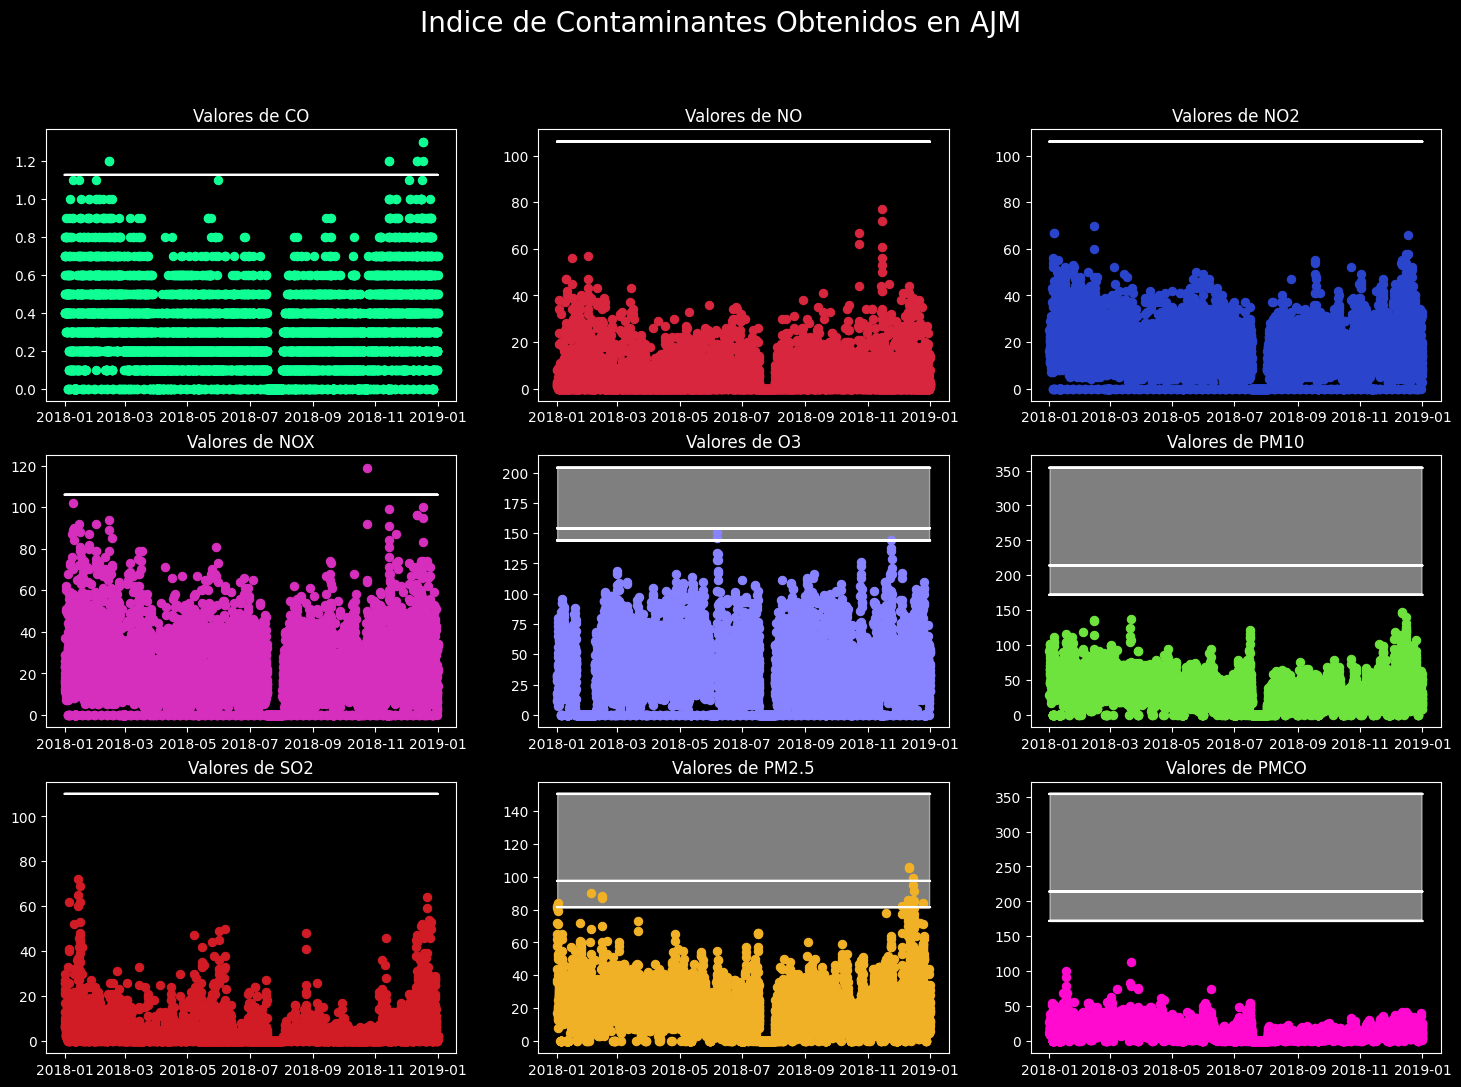

In [11]:
# SE GRAFICAN LOS RESULTADOS
plt.style.use('dark_background')
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(18,12))
plt.suptitle(f'Indice de Contaminantes Obtenidos en {estacionMAX}', fontsize=20)

for idx, contaminante in enumerate(tb_ajusco.columns):
    plt.subplot(3, 3, idx+1)
    #for j in contingencias[idx]:
    if len(contingencias[idx]) > 1:
        #print(contingencias[idx][0])
        plt.fill_between(tb_ajusco.index,
                np.ones(8760)*contingencias[idx][0],
                np.ones(8760)*contingencias[idx][2],
                color="white", alpha=0.15)
        plt.plot(tb_ajusco.index,np.ones(8760)*contingencias[idx][0], c = 'white')
        plt.plot(tb_ajusco.index,np.ones(8760)*contingencias[idx][1], c = 'white')
        plt.plot(tb_ajusco.index,np.ones(8760)*contingencias[idx][2], c = 'white')
    else:
        plt.plot(tb_ajusco.index,np.ones(8760)*contingencias[idx][0], c = 'white')
    plt.scatter(tb_ajusco.index, tb_ajusco[contaminante], linewidths=0.8, color=colores[idx])
    plt.title(f'Valores de {contaminante}')

plt.show()